<a href="https://colab.research.google.com/github/lindsay99m/Regression/blob/main/LMoller_Regression_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression ML: Torando Economic Loss Prediction

# Introduction

 I will be using tornado data from NOAA's Sever Weather and Storm Prediction center
(https:/ /www.spc.noaa.gov/wcm/#data). I am interested in this data as it relates to my work on extreme event attribution and contains
data of injures, fatalities, and economic damage left by tornados recorded from 1950 to 2023. I will use this data to try and estimate
economic damage in dollar amounts and mortality rates to specific f-scale tornado rates/wind speeds in an attempt to predict future loss
and damages of torandoes. Being able to accurately estimate the total loss and damages of potential tornados based off of historical data will help local governments estimate potential loss and damages and help better allocate funds for future hazards.

**DISCLAIMER: Use High-RAM when running this notebook**

# Pre-processing

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#load in dataset
url = 'https://raw.githubusercontent.com/lindsay99m/Regression/809c517e661f8bde1c888fdd20bf4a77bec5fa56/1950-2023_all_tornadoes.csv'

data = pd.read_csv(url)
data.describe()

,om,yr,mo,dy,tz,stf,stn,mag,inj,fat,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
count,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,...,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000
mean,123921.574162,1992.500140,5.945713,15.938752,3.000924,29.111586,22.557691,0.657862,1.575506,0.103014,...,3.649528,113.051248,1.026906,0.989566,0.998165,104.276660,9.022242,1.836480,0.578700,0.026107
std,235622.304082,19.876577,2.457315,8.770595,0.071003,15.017406,31.533645,1.481439,19.993546,1.604690,...,8.604926,216.507171,0.166080,0.101616,0.457422,96.148065,39.010755,17.305165,9.687358,0.159455
min,1.000000,1950.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,289.000000,1976.000000,4.000000,8.000000,3.000000,18.000000,1.000000,0.000000,0.000000,0.000000,...,0.160000,20.000000,1.000000,1.000000,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000
50%,602.000000,1995.000000,6.000000,16.000000,3.000000,28.000000,11.000000,1.000000,0.000000,0.000000,...,0.900000,50.000000,1.000000,1.000000,1.000000,85.000000,0.000000,0.000000,0.000000,0.000000
75%,1212.000000,2009.000000,7.000000,24.000000,3.000000,42.000000,30.000000,1.000000,0.000000,0.000000,...,3.500000,100.000000,1.000000,1.000000,1.000000,135.000000,0.000000,0.000000,0.000000,0.000000
max,623401.000000,2023.000000,12.000000,31.000000,9.000000,78.000000,232.000000,5.000000,1740.000000,158.000000,...,234.700000,4576.000000,3.000000,1.000000,2.000000,810.000000,820.000000,710.000000,507.000000,1.000000


In [ ]:
#show that the dataset fits the perameters
data.shape

(71398, 29)

In [ ]:
#check column names and look for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71398 entries, 0 to 71397
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      71398 non-null  int64  
 1   yr      71398 non-null  int64  
 2   mo      71398 non-null  int64  
 3   dy      71398 non-null  int64  
 4   date    71398 non-null  object 
 5   time    71398 non-null  object 
 6   tz      71398 non-null  int64  
 7   st      71398 non-null  object 
 8   stf     71398 non-null  int64  
 9   stn     71398 non-null  int64  
 10  mag     71398 non-null  int64  
 11  inj     71398 non-null  int64  
 12  fat     71398 non-null  int64  
 13  loss    71398 non-null  float64
 14  closs   71398 non-null  float64
 15  slat    71398 non-null  float64
 16  slon    71398 non-null  float64
 17  elat    71398 non-null  float64
 18  elon    71398 non-null  float64
 19  len     71398 non-null  float64
 20  wid     71398 non-null  int64  
 21  ns      71398 non-null  int64  
 22

In [ ]:
#rename columns
data.rename(columns={'om' : 'count',
                     'mag' : 'f-scale',
                     'inj' : 'injuries',
                     'fat' : 'fatalities',
                     'closs' : 'crop_loss',
                     'slat' : 'start_lat',
                     'slong' : 'start_long',
                     'elat' : 'end_lat',
                     'elong' : 'end_long',
                     'len' : 'length_mi',
                     'wid' : 'width_yd',
                     'ns' :'state_count',
                     'sn' : 'track',
                     'seg' : 'tornado_segment'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71398 entries, 0 to 71397
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   count        71398 non-null  int64  
 1   yr           71398 non-null  int64  
 2   mo           71398 non-null  int64  
 3   dy           71398 non-null  int64  
 4   date         71398 non-null  object 
 5   time         71398 non-null  object 
 6   tz           71398 non-null  int64  
 7   st           71398 non-null  object 
 8   stf          71398 non-null  int64  
 9   stn          71398 non-null  int64  
 10  f-scale      71398 non-null  int64  
 11  injuries     71398 non-null  int64  
 12  fatalities   71398 non-null  int64  
 13  loss         71398 non-null  float64
 14  crop_loss    71398 non-null  float64
 15  start_lat    71398 non-null  float64
 16  slon         71398 non-null  float64
 17  end_lat      71398 non-null  float64
 18  elon         71398 non-null  float64
 19  leng

In [ ]:
# Delete rows where 'f-scale' is not in [0, 1, 2, 3, 4, 5] so only known f-scale measures are recorded
valid_f_scales = [0, 1, 2, 3, 4, 5]
data = data[data['f-scale'].isin(valid_f_scales)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70367 entries, 0 to 71397
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   count        70367 non-null  int64  
 1   yr           70367 non-null  int64  
 2   mo           70367 non-null  int64  
 3   dy           70367 non-null  int64  
 4   date         70367 non-null  object 
 5   time         70367 non-null  object 
 6   tz           70367 non-null  int64  
 7   st           70367 non-null  object 
 8   stf          70367 non-null  int64  
 9   stn          70367 non-null  int64  
 10  f-scale      70367 non-null  int64  
 11  injuries     70367 non-null  int64  
 12  fatalities   70367 non-null  int64  
 13  loss         70367 non-null  float64
 14  crop_loss    70367 non-null  float64
 15  start_lat    70367 non-null  float64
 16  slon         70367 non-null  float64
 17  end_lat      70367 non-null  float64
 18  elon         70367 non-null  float64
 19  length_mi

# EDA

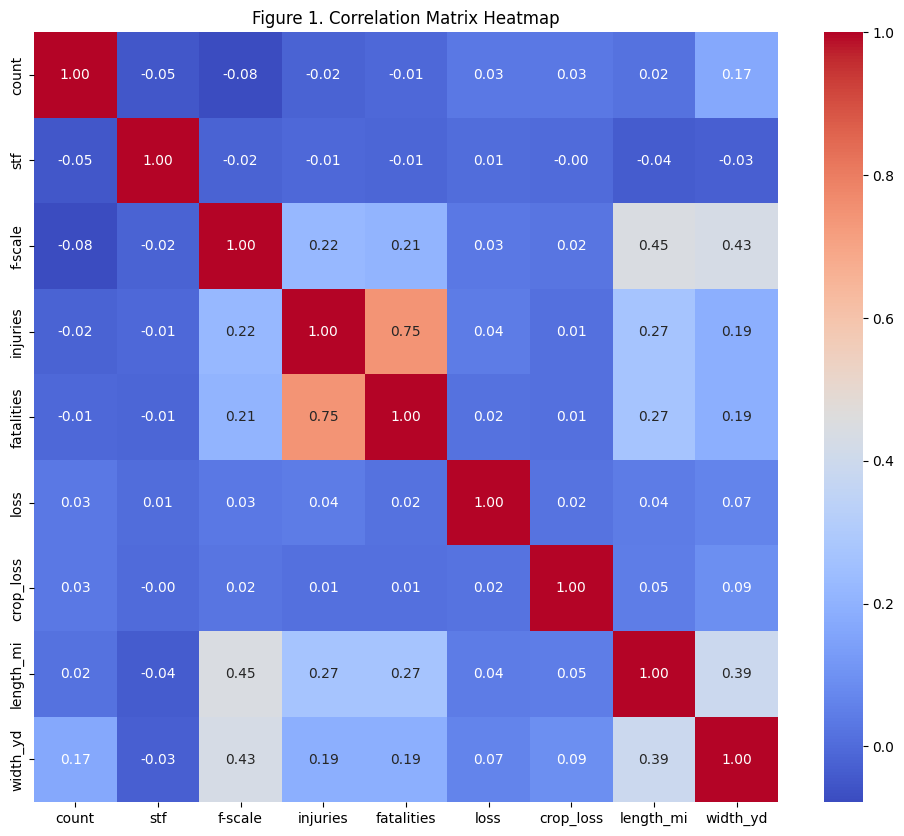

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = ['count', 'stf', 'f-scale', 'injuries', 'fatalities', 'loss', 'crop_loss', 'length_mi', 'width_yd']

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure 1. Correlation Matrix Heatmap')
plt.show()

The correlation heatmap matrix shows there is a strong correlation between injuries and fatalities and a correlation between width and length of the tornado path. There appears to be a slight correlation between tornado path length  and width and fatalities, injuries, and magnitude.

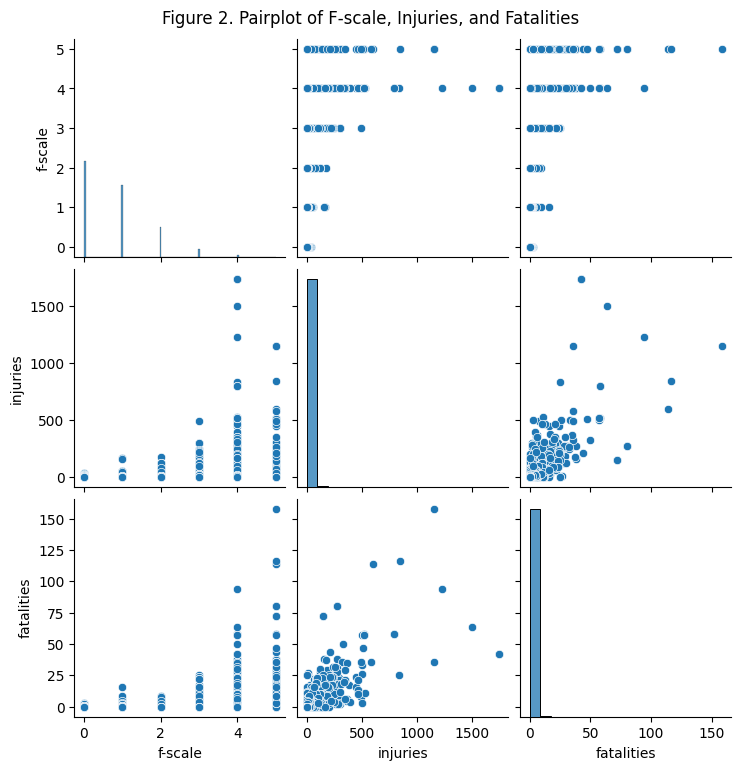

In [ ]:
# Select columns for pairplot
cols_for_pairplot = ['f-scale', 'injuries', 'fatalities']
# Create the pairplot
sns.pairplot(data[cols_for_pairplot])
plt.suptitle('Figure 2. Pairplot of F-scale, Injuries, and Fatalities', y=1.02)
plt.show()


The pairplot shows that data clustering is most apparent between injuries and fatalities and less apparent with f-scale.

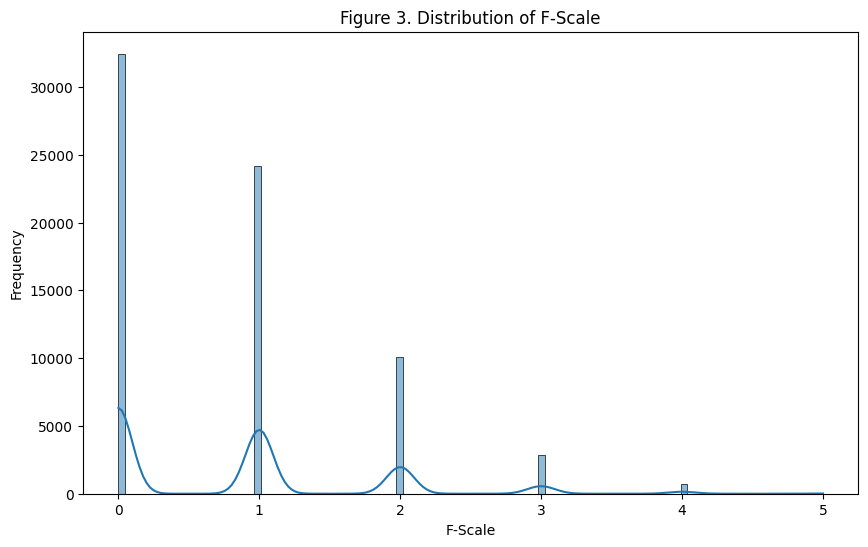

In [ ]:
# Create the distribution plot for 'f-scale'
plt.figure(figsize=(10, 6))
sns.histplot(data['f-scale'], kde=True)  # Use histplot for distribution
plt.title('Figure 3. Distribution of F-Scale')
plt.xlabel('F-Scale')
plt.ylabel('Frequency')
plt.show()


The distribution plot shows that the recorded tornadoes are heavily skweded towards lower level 0-1 f-scale events while significantly less 3-5 f-scale events are recorded.

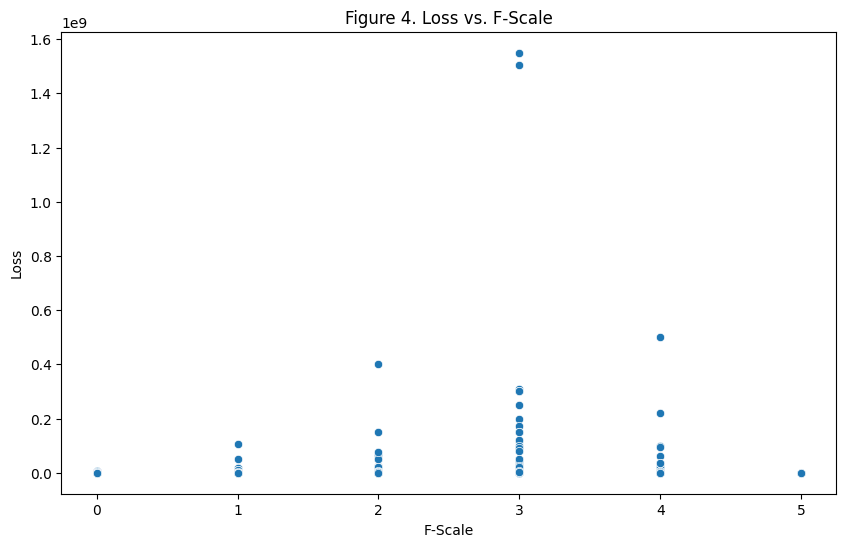

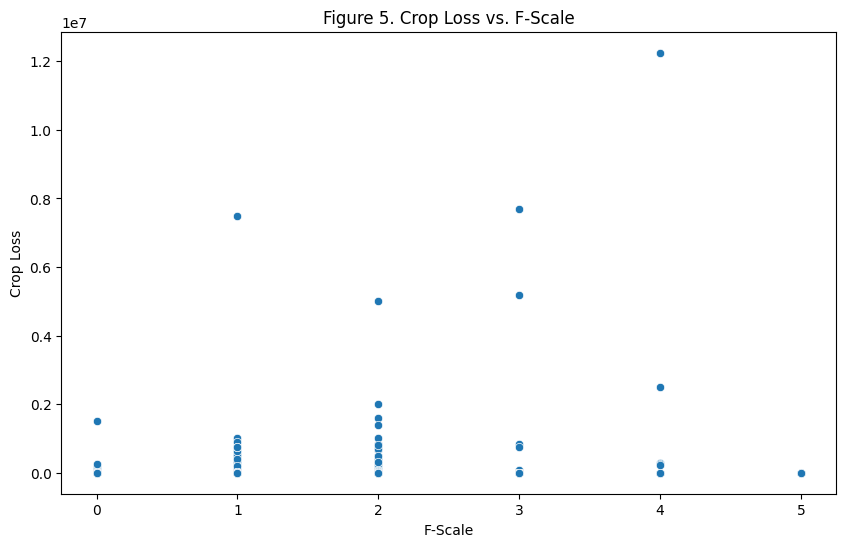

In [ ]:
# Create the scatter plot of 'loss' vs 'f-scale'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='loss', data=data)
plt.title('Figure 4. Loss vs. F-Scale')
plt.xlabel('F-Scale')
plt.ylabel('Loss')
plt.show()

# Create the scatter plot of 'crop_loss' vs 'f-scale'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='crop_loss', data=data)
plt.title('Figure 5. Crop Loss vs. F-Scale')
plt.xlabel('F-Scale')
plt.ylabel('Crop Loss')
plt.show()


These two plots show that significantly more economic loss and crop loss has been caused by mid grade tornadoes. This data is likely skewed due to the significantly higher number of 0 f-scale tornadoes.

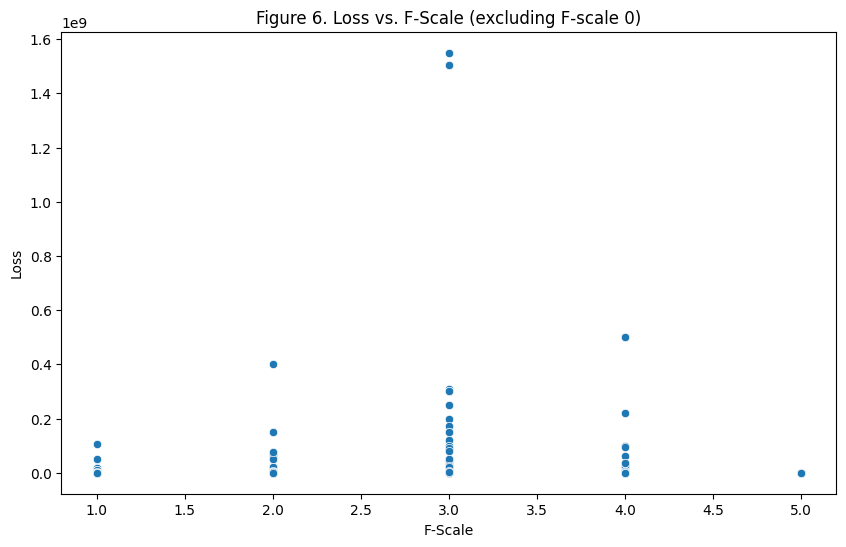

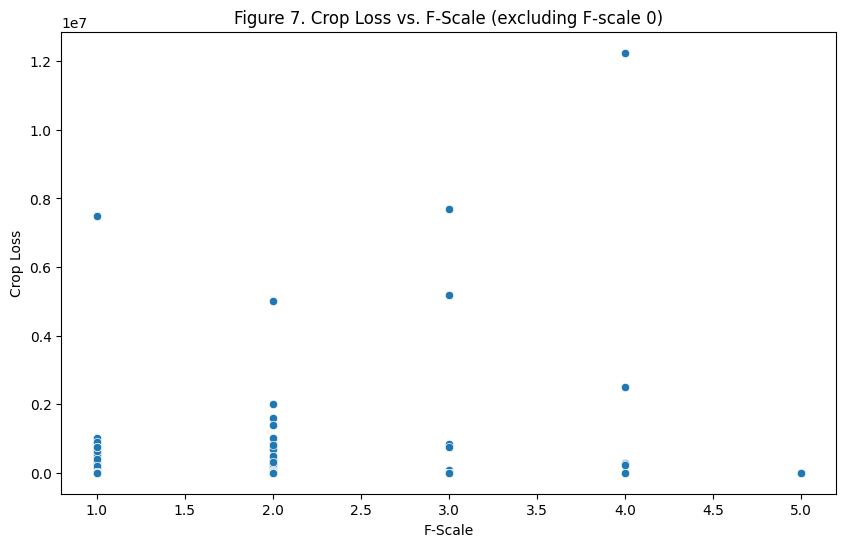

In [ ]:
# Create the scatter plot of 'loss' vs 'f-scale', ignoring f-scale values of 0
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='loss', data=data[data['f-scale'] != 0])
plt.title('Figure 6. Loss vs. F-Scale (excluding F-scale 0)')
plt.xlabel('F-Scale')
plt.ylabel('Loss')
plt.show()

# Create the scatter plot of 'crop_loss' vs 'f-scale', ignoring f-scale values of 0
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='crop_loss', data=data[data['f-scale'] != 0])
plt.title('Figure 7. Crop Loss vs. F-Scale (excluding F-scale 0)')
plt.xlabel('F-Scale')
plt.ylabel('Crop Loss')
plt.show()


By removing the f-scale 0 events we are able to better see the distribution on loss and crop loss of stronger tornadoes. On average the 2-4 scale toradoes have recorded higher economic damage.

# Pre-processing for modeling

In [ ]:
#drop unnecessary columns (these values will interfere with the models ability to run)
data.drop(['date', 'time','st', 'count', 'yr', 'mo', 'dy', 'tz', 'stf', 'stn', 'state_count', 'slon', 'start_lat', 'end_lat', 'elon', 'track', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70367 entries, 0 to 71397
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f-scale     70367 non-null  int64  
 1   injuries    70367 non-null  int64  
 2   fatalities  70367 non-null  int64  
 3   loss        70367 non-null  float64
 4   crop_loss   70367 non-null  float64
 5   length_mi   70367 non-null  float64
 6   width_yd    70367 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 4.3 MB


In [ ]:
#split data
from sklearn.model_selection import train_test_split

# Example: Predict 'loss' based on other features
X = data.drop('loss', axis=1)  # Features (all columns except 'loss')
y = data['loss']  # Target variable ('loss')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (56293, 6)
Testing data shape: (14074, 6)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training data shape:", X_train_scaled.shape)
print("Scaled Testing data shape:", X_test_scaled.shape)
print(data.head())

Scaled Training data shape: (56293, 6)
Scaled Testing data shape: (14074, 6)
   f-scale  injuries  fatalities  loss  crop_loss  length_mi  width_yd
0        1         0           0   4.0        0.0       15.8        10
1        3         3           0   5.0        0.0        2.0       880
2        2         0           0   5.0        0.0        0.1        10
3        1         0           0   5.0        0.0        0.1        10
4        1         3           0   4.0        0.0        2.0        37


In [ ]:
#test for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Remove any non-numeric columns before calculating VIF
X_train_numeric = X_train.select_dtypes(include=['number'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

print(vif_data)

      feature       VIF
0     f-scale  1.817400
1    injuries  2.286965
2  fatalities  2.287135
3   crop_loss  1.005181
4   length_mi  1.640697
5    width_yd  1.650820


The VIF values are all between 1-5 which means that loss is moderately correlated to these features, but not strongly correlated. Interestingly, loss is least correlated with crop loss (this could be because they are inversely related, if torandos land on crop land then they will have higher croploss but lower economic loss and it is unlikely it is damaging a significant number of buildings).

# Modeling

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import KFold

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, shuffled data

rmse_scores = []
mae_scores = []

# Perform cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Evaluate the model and store scores
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# Print average scores from cross-validation
print(f"Average Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Average Mean Absolute Error (MAE): {np.mean(mae_scores)}")

Average Root Mean Squared Error (RMSE): 6525480.4346392285
Average Mean Absolute Error (MAE): 366156.52347126335


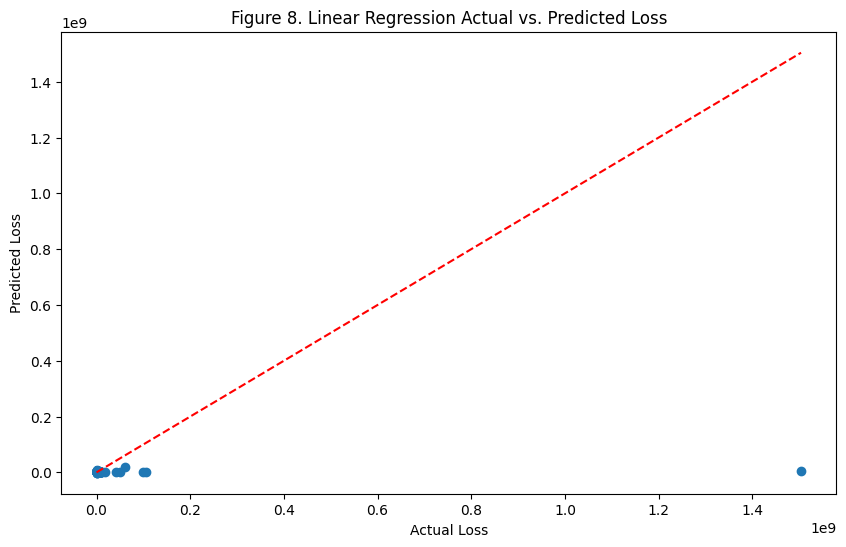

In [ ]:
#Plot model
# Retrain the model on the full training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)  # Use X_test for predictions

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Figure 8. Linear Regression Actual vs. Predicted Loss")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()

The Linear regression model scored very high values in both RMSE and MAE scoring meaning that the model is statistically very unreliable. Due to outliers in the data it is extremely difficult to decipher whether the high RMSE and MAE is due to overlapping outliers or if the values scattered close to 0.0 are actually father appart than can be seen from this plot.

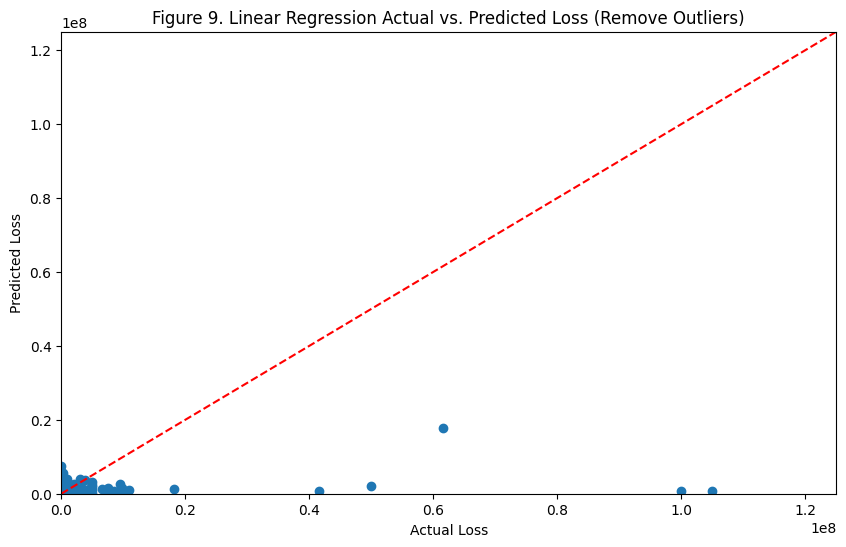

In [ ]:
#Plot Model without outliers for better readability

# Retrain the model on the full training set
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)  # Use X_test for predictions

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Figure 9. Linear Regression Actual vs. Predicted Loss (Remove Outliers)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.xlim(0, 0.125e9)
plt.ylim(0, 0.125e9)
plt.show()

In order to better understand the model's performance in a visual plot, I removed the outlier from the plot range to beeter see the distribution of points. For low levels of loss the model preformed relatively well, however it was not able to accurately predict higher levels of economic loss. It also erred on the side of predicting close to 0.0 of loss even when the actual recorded loss was significant. This is not a good model for usage in the real world as it underpredicts the amount of loss and damage and will therefore level people unprepared for tornados.

## Support Vector Machine (SVM)

Warning this model runs very slowly

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import KFold

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, shuffled data

rmse_scores = []
mae_scores = []

# Perform cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize and train the SVM model
    svm_model = SVR(kernel='poly', degree=3)
    svm_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    svm_y_pred = svm_model.predict(X_val)

    # Evaluate the model and store scores
    rmse = np.sqrt(mean_squared_error(y_val, svm_y_pred))
    mae = mean_absolute_error(y_val, svm_y_pred)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# Print average scores from cross-validation
print(f"Average SVM - Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Average SVM - Mean Absolute Error (MAE): {np.mean(mae_scores)}")

Average SVM - Root Mean Squared Error (RMSE): 6532008.172014103
Average SVM - Mean Absolute Error (MAE): 134077.2191732612


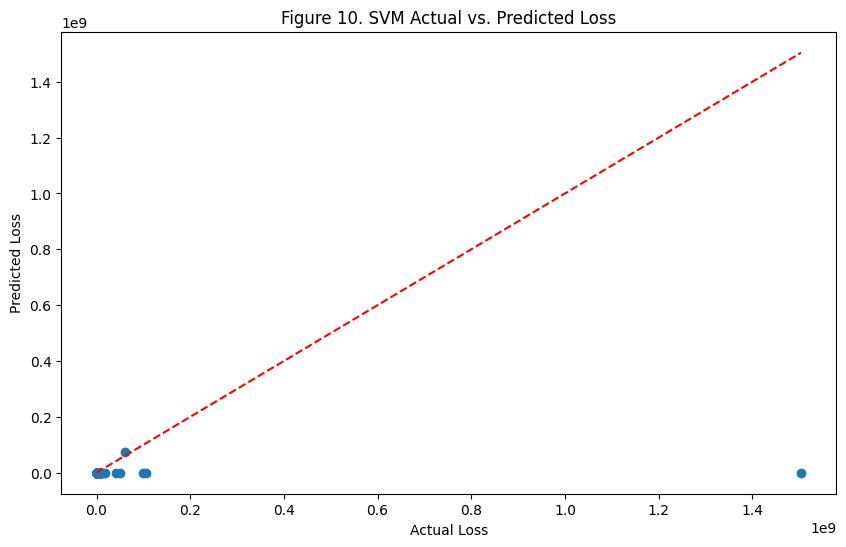

In [ ]:
# Plot the model
#train the SVM model
svm_model = SVR(kernel='poly', degree=3)
svm_model.fit(X_train_fold, y_train_fold)

svm_y_pred = svm_model.predict(X_test)

#plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_y_pred)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Figure 10. SVM Actual vs. Predicted Loss")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.show()

Like the linear regression model, the SVM model scored very high values in both RMSE and MAE scoring meaning that the model is statistically very unreliable. it scored slightly higher in RMSE than the linear regression model but lower in MSE. Due to outliers in the data it is extremely difficult to decipher whether the high RMSE and MAE is due to overlapping outliers or if the values scattered close to 0.0 are actually father appart than can be seen from this plot. The SVM model performed better than the linear regression model.

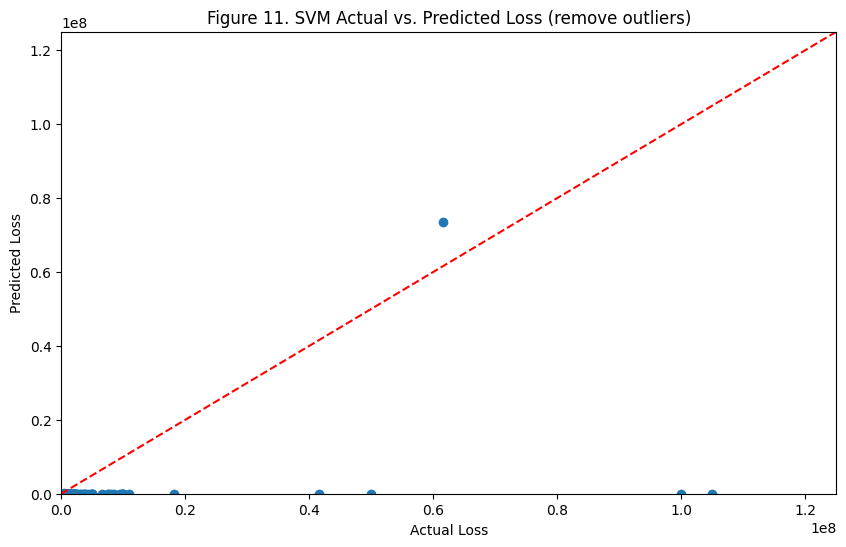

In [ ]:
#Plot the model without the outliers
#train the SVM model
svm_model = SVR(kernel='poly', degree=3)
svm_model.fit(X_train_fold, y_train_fold)

svm_y_pred = svm_model.predict(X_test)
#plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_y_pred)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Figure 11. SVM Actual vs. Predicted Loss (remove outliers)")

# Set x and y axis limits
plt.xlim(0, 0.125e9)
plt.ylim(0, 0.125e9)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()

By removing the outlying value from the graph it is easier to see the predicted disctribution of loss compared tot he actual. The model consistantly predicted close to 0.0 loss even when the actual loss was significant. In general this is not a good model for real world use as it will leave people unprepared for the amount of economic loss they could encounter from tornadoes. This model will give the public and local governments a false sense of security when it comes to potential economic loss.

## Gradient Boosting Classifier

Average Gradient Boosting - Root Mean Squared Error (RMSE): 7823290.510032386
Average Gradient Boosting - Mean Absolute Error (MAE): 282570.13165833976


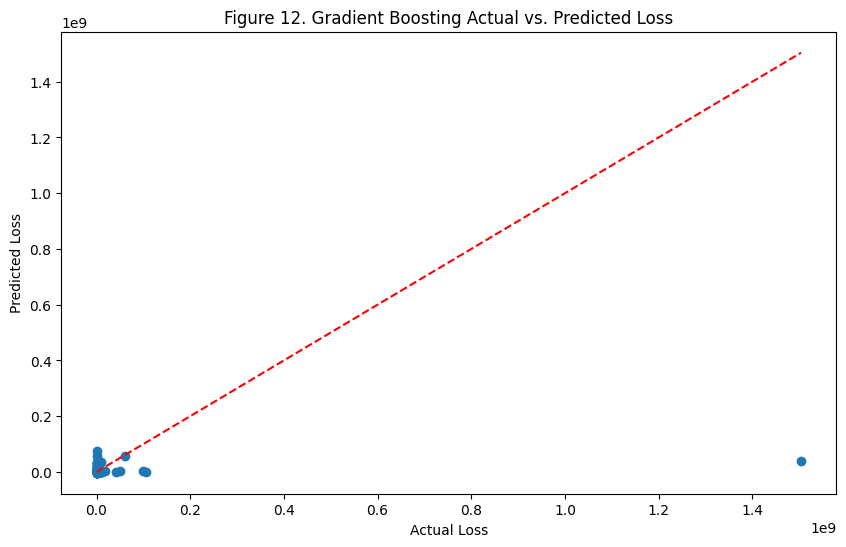

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, shuffled data

rmse_scores = []
mae_scores = []

# Perform cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize and train the Gradient Boosting model
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    gb_y_pred_fold = gb_model.predict(X_val_fold)

    # Evaluate the model and store scores
    rmse = np.sqrt(mean_squared_error(y_val_fold, gb_y_pred_fold))
    mae = mean_absolute_error(y_val_fold, gb_y_pred_fold)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# Print average scores from cross-validation
print(f"Average Gradient Boosting - Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Average Gradient Boosting - Mean Absolute Error (MAE): {np.mean(mae_scores)}")

# Train the final model on the full training dataset and predict for test dataset
final_gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
final_gb_model.fit(X_train, y_train)

gb_y_pred = final_gb_model.predict(X_test)

# Plot the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Figure 12. Gradient Boosting Actual vs. Predicted Loss")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.show()

The gradient boosting classifier model also scored very high values in both RMSE and MAE scoring meaning that the model is statistically very unreliable. It performed the worst in RMSE and scored in the middle for MAE. This model predicted a wider range of loss values than the other models and accurately predicted more points than the other two models. Due to outliers in the data it is extremely difficult to decipher whether the high RMSE and MAE is due to overlapping outliers or if the values scattered close to 0.0 are actually father appart than can be seen from this plot.

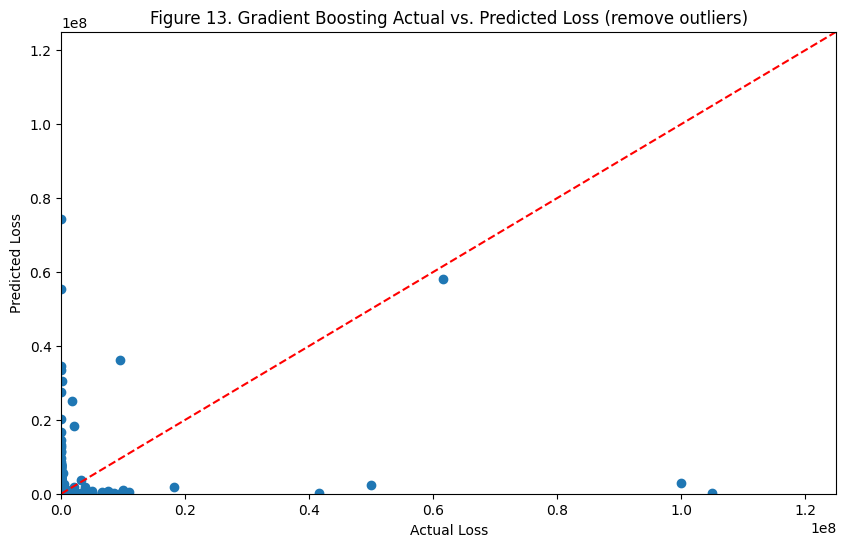

In [ ]:
#Plot the model without the outliers
# Train the Gradient Boosting model
final_gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
final_gb_model.fit(X_train, y_train)

gb_y_pred = final_gb_model.predict(X_test)

#Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Figure 13. Gradient Boosting Actual vs. Predicted Loss (remove outliers)")
# Set x and y axis limits
plt.xlim(0, 0.125e9)
plt.ylim(0, 0.125e9)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.show()

Removing the outlier allowed for a much clearer view of how the gradient boosting classifier model actually preformed. This model plotted a much wider range of predicted vs actual loss vaules and came very clsoe to accutatly predicting a few of the values. I like this model for real world usage the best out of the three as it predicts more non 0 values of loss than the other two models. While it is not as accurate at predicting lower levels of loss, it errs on the side of predicting higher loss than actually recorded (with a few very high loss exceptions). Predicting higher loss than recorded is better for a model as it will ensure people are prepared for more damage than will occur on average.

# Conclusion

Over all the regression models did not perform well in their ability to predict future economic loss from tornadoes based off of historical loss, f-scale, width, legth, injuries, fatalities, and crop loss. This could bee due to the fact that tornados are still very difficult to model and predict and due to the variability in where they land the amount of damage a tornado can do can range widely. The size and strength of a torando will not necessarily correlate to the damage it causes because very strong tornados can land in relatively empty areas and mild tornados can land in highly populated areas. the gradient boosting classifier model preformed the best as a real world model because it predicted more variable damage and was able to accurately predict some loss values. The linear regression model was better able to model lower loss tornadoes, but struggled with modeling high loss torandoes.

### Which method did you like the most?

I liked the gradient boosting classifier method the most because it gave me the most control with my hyperparameter tuning and allowed me to test out my model inorder to find the best fit between my model and my data. The gradient boosting classifier method also predicted more non zero loss and therefore works better as real world models.

### Which method did you like the least?

I liked the SVM model the least as I felt that model fit the actual data the least and used the bais in the data towards the lower end of the loss scale to predict little to no loss and despite scoring the best it preforms the worst for real world scenarios. If tornadoes are always predicted to have little to no economic loss then it could create huge issues for funding allocations for disaster relief.  

### How did you score these supervised models?  


I used RMSE and MAE to score all of my models. I used RMSE to try and stay away from large errors, however there is a significant outlier in the loss data which could pose an issue to the RMSE score. MAE on the other hand handles outliers better so I included MAE scoring as a comparison to RMSE.

### Did the output align with your geologic understanding?

Overall the output of my models aligned with my geologic understanding of tornadoes, because tornadoes are highly variable and hard to predict. Because they tend to fall in the midwest the amount of damage they cause can also be highly variable depending on if they travel through towns, farms, and refineries or if they fall and travel through unpopulated plains and other areas that are used by people. So even if a torando is recorded at a 5 on the f-scale it could cause little to no economic damage based on where it falls. On the flip side a 2 f-scale tornado could cause significant economic damage if it falls in a populated area.

### What did you want to learn more about?

I would like to learn more about how these model perform in a more targeted way. Since damage from torandos is highly variable based on location I would like to test how the same models would perform on a smaller scale (for example by state or by county). This would help me better understand if the models would be useful for specific state or county governments to predict economic loss and therefore could help infomr disaster releif funding allocations. Similiarly I think it would be interesting to compare loss on a temporal scale to see if buildings are being built to resist tornados and if newer buildings are less succeptable to damage.

### Did you pre-process your data?

I cleaned my data and removed variables that were unnecessary for the models. I also used MinMaxScaler to scale the important variables. I removed the temporal and spatial data from my dataset in the pre-processing section and then randomly split my data using a 80% training and 20% testing split. I scaled my data after splitting it in order to decrease data leakage that was occuring when I had previously scaled my data before splitting it. I also checked for multicollinearity between my model features and made sure to implement cross valdidation on my models. After running cross validation on my models my performance score's significantly imporved (although they are still very high).

### Do all models require pre-processing?

Linear regression requires little to no pre-processing besides dataset cleaning due to its simplicity, but in general it is always good to pre-process your data to help improve model training and performance. More complex regression models require more indepth pre-processing.